### Spawn objects along with `Panda`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Done.")

Done.


### Parse `Panda` with objects

In [2]:
env = MuJoCoParserClass(name='Panda',rel_xml_path='../asset/panda/franka_panda_w_objs.xml',VERBOSE=True)

[Panda] Instantiated from [/Users/sj/Dropbox/SJ/Research/Implementation/simple-mujoco-usage-v2/asset/panda/franka_panda_w_objs.xml]
- Simulation timestep is [0.0020]sec and frequency is [500]HZ
- [Panda] has [23] bodies and body names are
['world', 'panda_base', 'panda_pedestal', 'panda_link_0', 'panda_link_1', 'panda_link_2', 'panda_link_3', 'panda_link_4', 'panda_link_5', 'panda_link_6', 'panda_link_7', 'right_hand', 'panda_right_gripper', 'panda_eef', 'panda_leftfinger', 'panda_finger_joint1_tip', 'panda_rightfinger', 'panda_finger_joint2_tip', 'work_space', 'obj_box_01', 'obj_box_02', 'obj_cylinder_01', 'obj_cylinder_02']
- [Panda] has [13] joints
 [00] name:[panda_joint1] type:[revolute] joint range:[-2.90 to 2.90]
 [01] name:[panda_joint2] type:[revolute] joint range:[-1.76 to 1.76]
 [02] name:[panda_joint3] type:[revolute] joint range:[-2.90 to 2.90]
 [03] name:[panda_joint4] type:[revolute] joint range:[-3.07 to -0.07]
 [04] name:[panda_joint5] type:[revolute] joint range:[-2.9

### Plot

Creating window glfw
Creating offscreen glfw


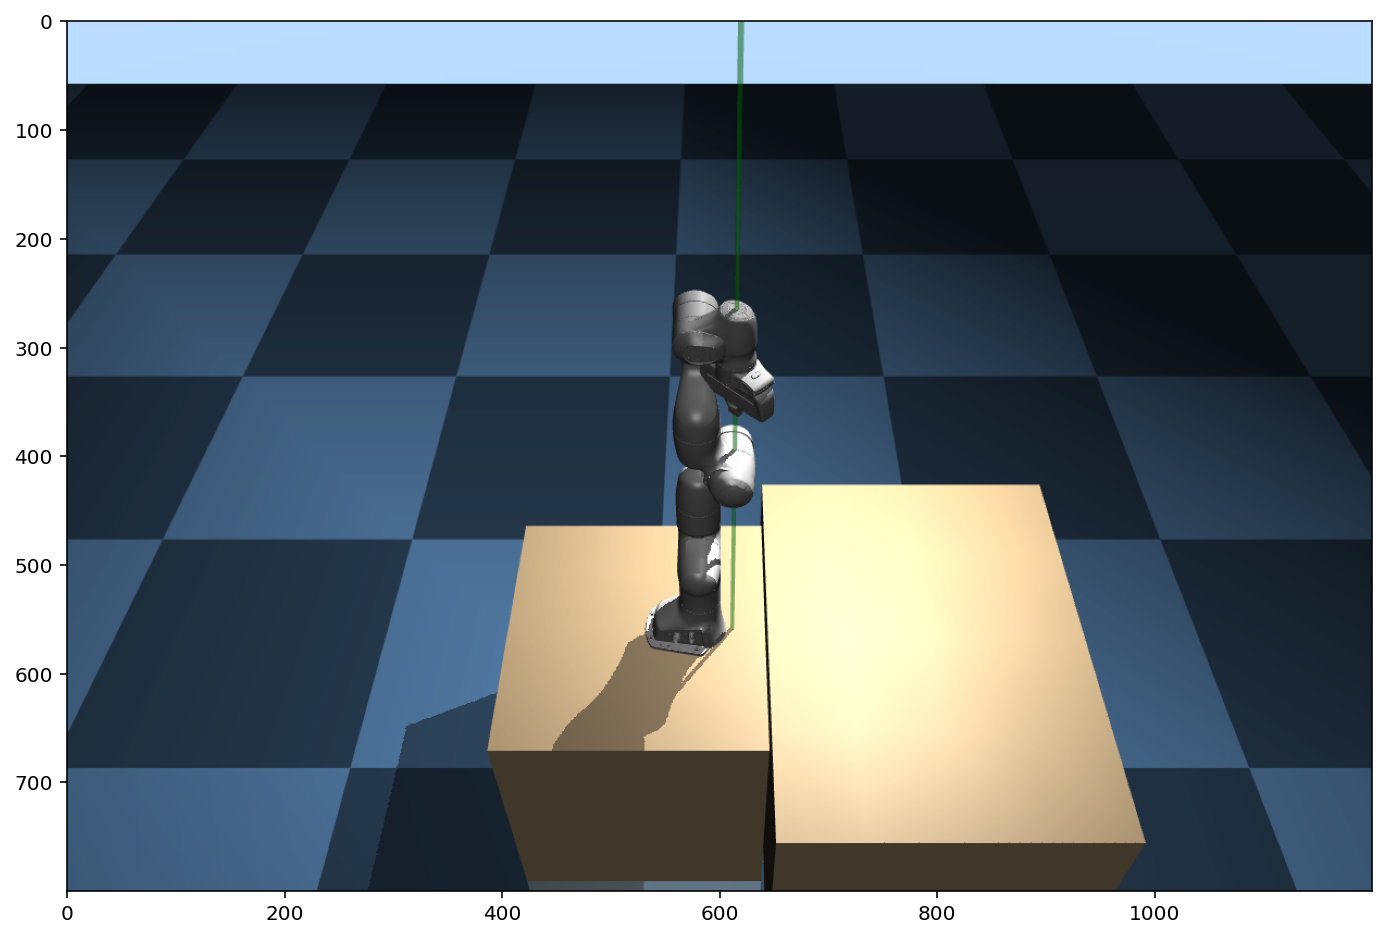

In [3]:
env.init_viewer(TERMINATE_GLFW=False,INITIALIZE_GLFW=True,window_width=0.5,window_height=0.5)
env.plot_scene()

### Random spawn objects

In [4]:
def set_object_pos(env,obj_name='obj_box_01',obj_pos=np.array([1.0,0.0,0.75])):
    """
        Set object location
    """
    # Get address
    qpos_addr = env.sim.model.get_joint_qpos_addr(obj_name)
    # Set position
    env.sim.data.qpos[qpos_addr[0]]   = obj_pos[0]
    env.sim.data.qpos[qpos_addr[0]+1] = obj_pos[1]
    env.sim.data.qpos[qpos_addr[0]+2] = obj_pos[2]
    # Set rotation (upstraight)
    env.sim.data.qpos[qpos_addr[0]+3:qpos_addr[1]] = [0,0,0,1]
print ("Done.")

Done.


In [5]:
set_object_pos(env,obj_name='obj_box_01',obj_pos=np.array([-1.0,0.0,0.0]))
set_object_pos(env,obj_name='obj_box_02',obj_pos=np.array([-1.0,0.1,0.0]))
set_object_pos(env,obj_name='obj_cylinder_01',obj_pos=np.array([-1.0,0.2,0.0]))
set_object_pos(env,obj_name='obj_cylinder_02',obj_pos=np.array([-1.0,0.3,0.0]))

In [6]:
env.init_viewer(TERMINATE_GLFW=False,INITIALIZE_GLFW=True,window_width=0.5,window_height=0.5)
while True:
    
    env.step()
    
    env.add_marker(pos=np.array([0,0,0]),radius=0.5,color=np.array([1,0,0,1]))
    env.add_marker(pos=np.array([1.0,0,1.0]),radius=0.05,color=np.array([1,0,0,1]),label='[1,0,1]')
    env.add_marker(pos=np.array([1.0,0,0.75]),radius=0.05,color=np.array([1,0,0,1]),label='[1,0,0.75]')
    env.add_marker(pos=np.array([1.0,0.25,0.75]),radius=0.05,color=np.array([1,0,0,1]),label='[1,0.25,0.75]')
    env.add_marker(pos=np.array([1.0,0,2.0]),radius=0.05,color=np.array([0,1,0,1]),label='[1,0,2]')
    
    env.render()

Creating window glfw


2022-08-18 17:33:56.834 python3.8[15817:1245768] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


SystemExit: 0

/opt/homebrew/Caskroom/miniforge/base/envs/torch-mac/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
